<a href="https://colab.research.google.com/github/krithikakondapalli/kpmg1c/blob/main/All_JSON_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
import requests
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("Imported libraries successfully.")

Imported libraries successfully.


# Step 2: Acquire all ~470 rows - Get json data from folders themselves
Question: Do we need to import all json objects under each model? I know the video Dr. Uohna made picks the top one, but I am unsure. This could give us more data points for model building.

In [2]:
# YOU MUST DO THIS LINE AND REMOUNT AND GO THROUGH NECESSARY STEPS
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#trying to copy to local disk
!rsync -ah --info=progress2 "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/llm_text_generation/" "/content/llm_text_generation/"
!rsync -ah --info=progress2 "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/mllm_text_generation/" "/content/mllm_text_generation/"
!rsync -ah --info=progress2 "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/diffusion/" "/content/diffusion/"

        104.78K 100%    0.90kB/s    0:01:51 (xfr#318, to-chk=0/385)
         14.19K 100%    0.83kB/s    0:00:15 (xfr#44, to-chk=0/66)
         28.70K 100%    0.64kB/s    0:00:42 (xfr#124, to-chk=0/176)


## LLM Text Generation

In [4]:
base_dir = "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/llm_text_generation"  # your local base folder (should be the same in everyone's drive)

llm_text_generation = []

for root, _, files in os.walk(base_dir):
    for file in files:
        # Skip non-JSON and models.json
        if file.endswith(".json") and file.lower() != "models.json":
            path = os.path.join(root, file)
            try:
                with open(path, "r", encoding="utf-8") as f:
                    data = json.load(f)

                # Assign Task_Type based on folder
                if "chat" in path.lower():
                    data["Task_Type"] = "llm_text_generation/chat"
                elif "code" in path.lower():
                    data["Task_Type"] = "llm_text_generation/code"
                else:
                    data["Task_Type"] = "llm_text_generation/unknown"

                llm_text_generation.append(data)

            except Exception as e:
                print(f"Failed to load {path}: {e}")

# Convert list of dicts to DataFrame
df_llm_text_generation = pd.DataFrame(llm_text_generation)

# Optional: move Task_Type to first column
cols = ["Task_Type"] + [c for c in df_llm_text_generation.columns if c != "Task_Type"]
df_llm_text_generation = df_llm_text_generation[cols]

In [5]:
print(df_llm_text_generation.columns)
df_llm_text_generation.shape

Index(['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)',
       'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens',
       'Avg BS (reqs)', 'Max BS (reqs)'],
      dtype='object')


(314, 11)

In [6]:
df_llm_text_generation.head()

,Task_Type,Model,GPU,TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs)
0,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,16.657673,0.061371,1607.859228,84.600610,126.970362,128
1,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,17.700690,0.079200,1714.571278,98.635366,190.465331,192
2,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,17.539938,0.106939,1776.423787,99.690244,315.570796,320
3,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,17.170182,0.123768,1830.073008,101.851829,494.492837,512
4,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1,1,21.536224,0.047926,1194.772611,89.073780,63.496883,64


## MLLM Text Generation

In [7]:
base_dir = "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/mllm_text_generation"  # your local base folder (should be the same in everyone's drive)

mllm_text_generation = []

for root, _, files in os.walk(base_dir):
    for file in files:
        # Skip non-JSON and models.json
        if file.endswith(".json") and file.lower() != "models.json":
            path = os.path.join(root, file)
            try:
                with open(path, "r", encoding="utf-8") as f:
                    data = json.load(f)

                # Assign Task_Type based on folder
                if "chat" in path.lower():
                    data["Task_Type"] = "mllm_text_generation/chat"
                else:
                    data["Task_Type"] = "mllm_text_generation/unknown"

                mllm_text_generation.append(data)

            except Exception as e:
                print(f"Failed to load {path}: {e}")

# Convert list of dicts to DataFrame
df_mllm_text_generation = pd.DataFrame(mllm_text_generation)

# Optional: move Task_Type to first column
cols = ["Task_Type"] + [c for c in df_mllm_text_generation.columns if c != "Task_Type"]
df_mllm_text_generation = df_mllm_text_generation[cols]

In [8]:
print(df_mllm_text_generation.columns)
df_mllm_text_generation.shape

Index(['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)',
       'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens',
       'Avg BS (reqs)', 'Max BS (reqs)'],
      dtype='object')


(42, 11)

In [10]:
df_mllm_text_generation.head()

,Task_Type,Model,GPU,TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs)
0,mllm_text_generation/chat,microsoft/Phi-3-vision-128k-instruct,NVIDIA H100 80GB HBM3,1,1,105.845777,0.088476,576.057025,158.778,62.955386,64
1,mllm_text_generation/chat,facebook/chameleon-7b,NVIDIA H100 80GB HBM3,1,1,99.202554,0.055587,786.975169,202.732,63.383352,64
2,mllm_text_generation/chat,facebook/chameleon-30b,NVIDIA H100 80GB HBM3,2,1,266.390295,0.080684,562.113080,186.340,63.349794,64
3,mllm_text_generation/chat,facebook/chameleon-30b,NVIDIA H100 80GB HBM3,2,1,243.560061,0.099111,681.337546,185.734,124.563736,128
4,mllm_text_generation/chat,llava-hf/llava-1.5-7b-hf,NVIDIA H100 80GB HBM3,1,1,48.937824,0.076979,1012.821618,135.912,125.510490,128


## Diffusion: image-to-video, text-to-image, text-to-video

In [9]:
base_dir = "/content/drive/MyDrive/KPMG 1C/Data_ML_Energy/diffusion"
diffusion_data = []

for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".json") and file.lower() != "models.json":
            path = os.path.join(root, file)
            try:
                with open(path, "r", encoding="utf-8") as f:
                    data = json.load(f)

                # Determine Task_Type from folder name
                if "image-to-video" in path.lower():
                    data["Task_Type"] = "diffusion/image-to-video"
                elif "text-to-image" in path.lower():
                    data["Task_Type"] = "diffusion/text-to-image"
                elif "text-to-video" in path.lower():
                    data["Task_Type"] = "diffusion/text-to-video"
                else:
                    data["Task_Type"] = "diffusion/unknown"

                diffusion_data.append(data)

            except Exception as e:
                print(f"Failed to load {path}: {e}")

# Convert to DataFrame
df_diffusion = pd.DataFrame(diffusion_data)

# Optional: move Task_Type to first column
cols = ["Task_Type"] + [c for c in df_diffusion.columns if c != "Task_Type"]
df_diffusion = df_diffusion[cols]

In [11]:
print(df_diffusion.columns)
df_diffusion.shape

Index(['Task_Type', 'Model', 'GPU', 'Energy/video (J)', 'Batch latency (s)',
       'Batch size', 'Denoising steps', 'Frames', 'Energy/image (J)'],
      dtype='object')


(118, 9)

In [12]:
df_diffusion.head()

,Task_Type,Model,GPU,Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J)
0,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1039.842375,10.828980,4,25,16.0,NaN
1,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1001.890725,20.911451,8,25,16.0,NaN
2,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1153.581700,3.237465,1,25,16.0,NaN
3,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1088.232150,5.810183,2,25,16.0,NaN
4,diffusion/text-to-video,ali-vilab/text-to-video-ms-1.7b,NVIDIA A100-SXM4-40GB,1002.383056,42.212761,16,25,16.0,NaN


## Combine LLM, MLLM, & Diffusion


In [13]:
df_all_tasks = pd.concat([df_llm_text_generation, df_mllm_text_generation, df_diffusion], ignore_index=True)

# Optional: move Task_Type to first column
cols = ["Task_Type"] + [c for c in df_all_tasks.columns if c != "Task_Type"]
df_all_tasks = df_all_tasks[cols]

print(f"Combined dataset shape: {df_all_tasks.shape}")
print(df_all_tasks["Task_Type"].value_counts())
print(df_all_tasks.columns)

Combined dataset shape: (474, 17)
Task_Type
llm_text_generation/chat     191
llm_text_generation/code     123
diffusion/text-to-image       86
mllm_text_generation/chat     42
diffusion/text-to-video       16
diffusion/image-to-video      16
Name: count, dtype: int64
Index(['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)',
       'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens',
       'Avg BS (reqs)', 'Max BS (reqs)', 'Energy/video (J)',
       'Batch latency (s)', 'Batch size', 'Denoising steps', 'Frames',
       'Energy/image (J)'],
      dtype='object')


In [14]:
# PLEASE READ: ONLY RUN THIS CELL IF YOU WANT TO DOWNLOAD THE RAW CSV FILE
from google.colab import files

# Save CSV
df_all_tasks.to_csv("combined_tasks.csv", index=False)

# Download to your computer
files.download("combined_tasks.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df_all_tasks.head()

,Task_Type,Model,GPU,TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs),Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J)
0,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,16.657673,0.061371,1607.859228,84.600610,126.970362,128.0,NaN,NaN,NaN,NaN,NaN,NaN
1,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.700690,0.079200,1714.571278,98.635366,190.465331,192.0,NaN,NaN,NaN,NaN,NaN,NaN
2,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.539938,0.106939,1776.423787,99.690244,315.570796,320.0,NaN,NaN,NaN,NaN,NaN,NaN
3,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.170182,0.123768,1830.073008,101.851829,494.492837,512.0,NaN,NaN,NaN,NaN,NaN,NaN
4,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,21.536224,0.047926,1194.772611,89.073780,63.496883,64.0,NaN,NaN,NaN,NaN,NaN,NaN


# Step 3a: DF.INFO AND HISTOGRAMS

In [16]:
df_all_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Task_Type           474 non-null    object 
 1   Model               474 non-null    object 
 2   GPU                 474 non-null    object 
 3   TP                  356 non-null    float64
 4   PP                  356 non-null    float64
 5   Energy/req (J)      356 non-null    float64
 6   Avg TPOT (s)        356 non-null    float64
 7   Token tput (tok/s)  356 non-null    float64
 8   Avg Output Tokens   356 non-null    float64
 9   Avg BS (reqs)       356 non-null    float64
 10  Max BS (reqs)       356 non-null    float64
 11  Energy/video (J)    32 non-null     float64
 12  Batch latency (s)   118 non-null    float64
 13  Batch size          118 non-null    float64
 14  Denoising steps     118 non-null    float64
 15  Frames              32 non-null     float64
 16  Energy/i

# Step 3b: Explore Raw Data



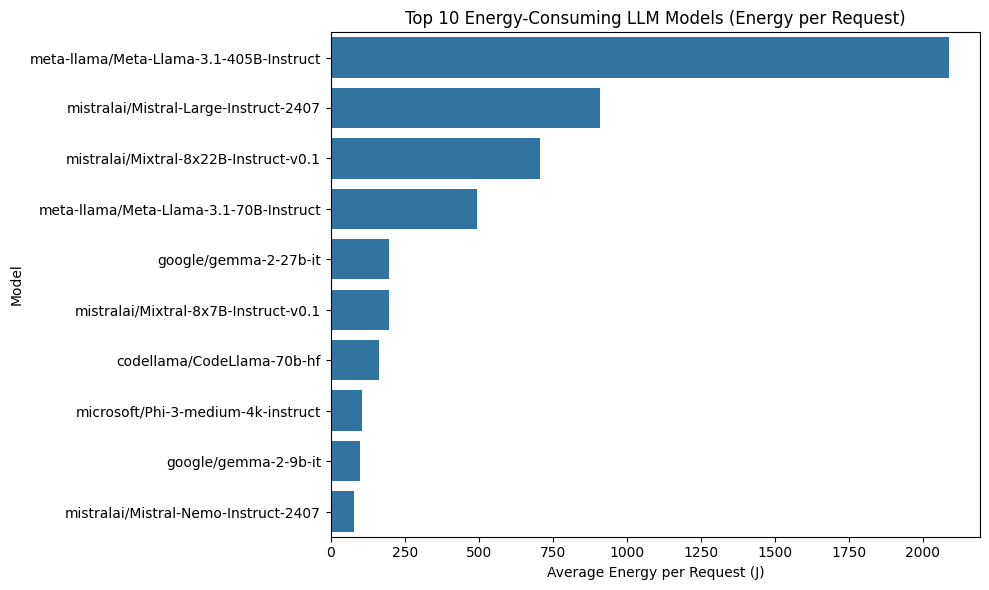

In [17]:
# df_llm_text_generation
plt.figure(figsize=(10,6))
sns.barplot(
    data=(df_llm_text_generation.groupby("Model")["Energy/req (J)"]
          .mean()
          .reset_index()
          .sort_values("Energy/req (J)", ascending=False)
          .head(10)),
    x="Energy/req (J)",
    y="Model",
)
plt.title("Top 10 Energy-Consuming LLM Models (Energy per Request)")
plt.xlabel("Average Energy per Request (J)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


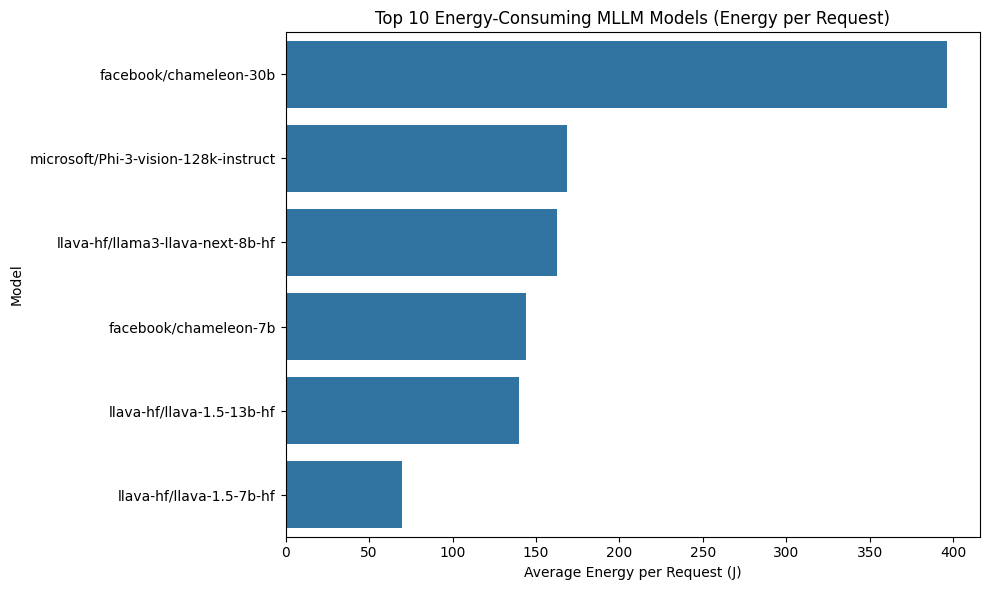

In [18]:
# df_mllm_text_generation
plt.figure(figsize=(10,6))
sns.barplot(
    data=(df_mllm_text_generation.groupby("Model")["Energy/req (J)"]
          .mean()
          .reset_index()
          .sort_values("Energy/req (J)", ascending=False)
          .head(10)),
    x="Energy/req (J)",
    y="Model",
)
plt.title("Top 10 Energy-Consuming MLLM Models (Energy per Request)")
plt.xlabel("Average Energy per Request (J)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

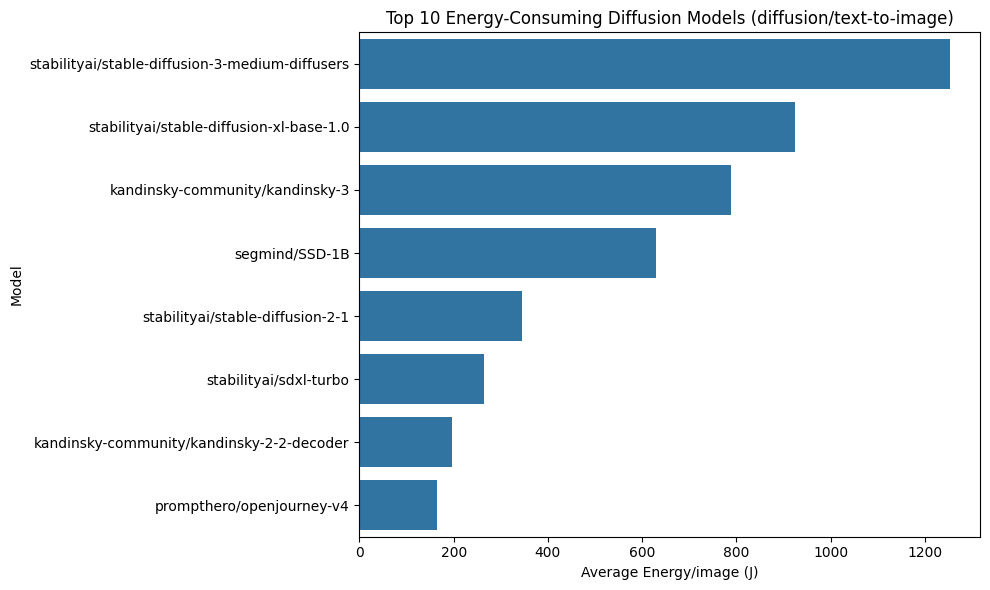

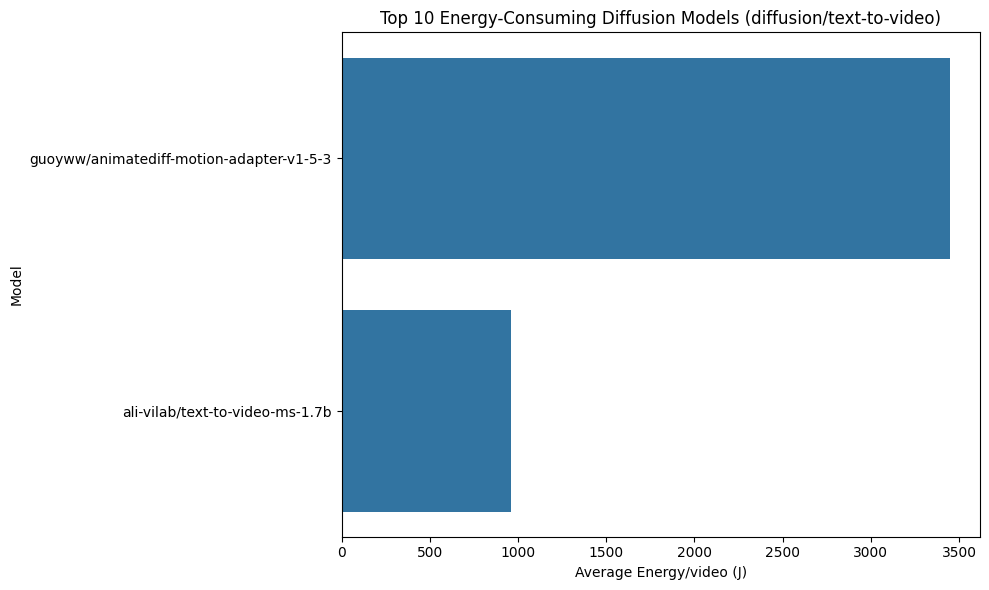

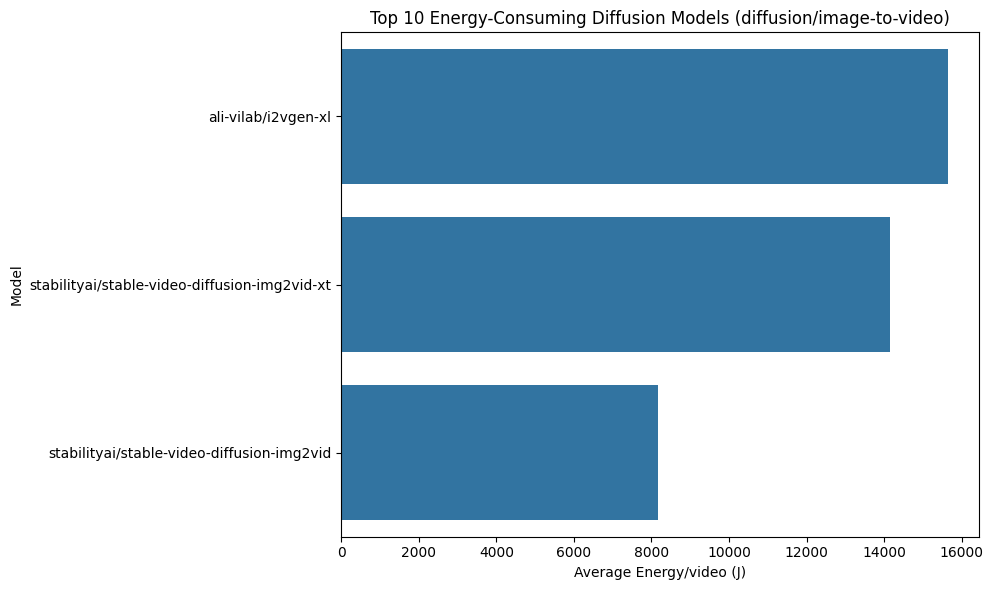

In [19]:
# df_diffusion
def plot_top_diffusion(df, task_type, energy_col, top_n=10):
    """Plot top N diffusion models for a given task type and energy metric."""
    df_task = df[df['Task_Type'] == task_type]
    top_models = (df_task.groupby("Model")[energy_col]
                  .mean()
                  .reset_index()
                  .sort_values(energy_col, ascending=False)
                  .head(top_n))

    plt.figure(figsize=(10,6))
    sns.barplot(data=top_models, x=energy_col, y="Model")
    plt.title(f"Top {top_n} Energy-Consuming Diffusion Models ({task_type})")
    plt.xlabel(f"Average {energy_col}")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()

# Text-to-Image
plot_top_diffusion(df_diffusion, "diffusion/text-to-image", "Energy/image (J)")

# Text-to-Video
plot_top_diffusion(df_diffusion, "diffusion/text-to-video", "Energy/video (J)")

# Image-to-Video
plot_top_diffusion(df_diffusion, "diffusion/image-to-video", "Energy/video (J)")


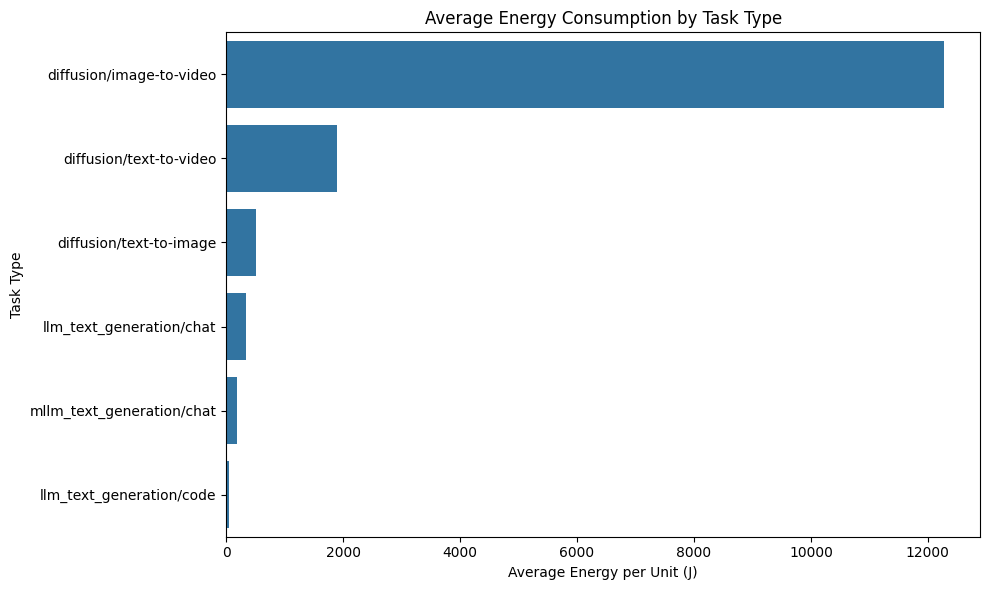

In [20]:
# average energy consumption per task type

df = df_all_tasks.copy()
df['energy_unit_j'] = np.where(
    df['Task_Type'].str.contains("llm|mllm"), df['Energy/req (J)'],
    np.where(df['Task_Type'] == "diffusion/text-to-image", df['Energy/image (J)'],
             df['Energy/video (J)'])
)

avg_energy_by_task = (df.groupby("Task_Type")['energy_unit_j']
                        .mean()
                        .reset_index()
                        .sort_values('energy_unit_j', ascending=False))

plt.figure(figsize=(10,6))
sns.barplot(data=avg_energy_by_task, x='energy_unit_j', y='Task_Type')
plt.title("Average Energy Consumption by Task Type")
plt.xlabel("Average Energy per Unit (J)")
plt.ylabel("Task Type")
plt.tight_layout()
plt.show()

# Step 4: Clean and Standardize Data For Further Insights and Modeling

## Rename column names to be more standardized

In [21]:
# rename
rename_map_units = {
    "Task_Type": "task_type",
    "Model": "model",
    "GPU": "gpu",
    "TP": "tensor_parallelism",
    "PP": "pipeline_parallelism",
    "Energy/req (J)": "energy_per_request_j",
    "Avg TPOT (s)": "avg_tpot_s",
    "Token tput (tok/s)": "token_throughput_tok_per_s",
    "Avg Output Tokens": "avg_output_tokens",
    "Avg BS (reqs)": "avg_batch_size_reqs",
    "Max BS (reqs)": "max_batch_size_reqs",
    "Energy/video (J)": "energy_per_video_j",
    "Batch latency (s)": "batch_latency_s",
    "Batch size": "batch_size",
    "Denoising steps": "denoising_steps",
    "Frames": "frames",
    "Energy/image (J)": "energy_per_image_j",
}

df_all_tasks.rename(columns=rename_map_units, inplace=True)
df_all_tasks.head()


,task_type,model,gpu,tensor_parallelism,pipeline_parallelism,energy_per_request_j,avg_tpot_s,token_throughput_tok_per_s,avg_output_tokens,avg_batch_size_reqs,max_batch_size_reqs,energy_per_video_j,batch_latency_s,batch_size,denoising_steps,frames,energy_per_image_j
0,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,16.657673,0.061371,1607.859228,84.600610,126.970362,128.0,NaN,NaN,NaN,NaN,NaN,NaN
1,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.700690,0.079200,1714.571278,98.635366,190.465331,192.0,NaN,NaN,NaN,NaN,NaN,NaN
2,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.539938,0.106939,1776.423787,99.690244,315.570796,320.0,NaN,NaN,NaN,NaN,NaN,NaN
3,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,17.170182,0.123768,1830.073008,101.851829,494.492837,512.0,NaN,NaN,NaN,NaN,NaN,NaN
4,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,1.0,1.0,21.536224,0.047926,1194.772611,89.073780,63.496883,64.0,NaN,NaN,NaN,NaN,NaN,NaN



## Normalize Energy Output

**Before Normalization:**

llm_text_generation - energy/request

mllm_text_generation - energy/request

diffusion/text-to-image - energy/image

diffusion/text-to-video - energy/video

diffusion/image-to-video - energy/video

**After Normalization:**

llm_text_generation - energy/token

mllm_text_generation - energy/token

diffusion/text-to-image - energy/image

diffusion/text-to-video - energy/frame

diffusion/image-to-video - energy/frame


In [22]:
# make a copy to avoid modifying the original
df_all_tasks_normalized = df_all_tasks.copy()

# create a standardized energy metric
df_all_tasks_normalized["energy_normalized_j"] = np.select(
    [
        df_all_tasks_normalized["task_type"].str.contains("llm|mllm", case=False, na=False),
        df_all_tasks_normalized["task_type"] == "diffusion/text-to-image",
        df_all_tasks_normalized["task_type"].str.contains("video", case=False, na=False)
    ],
    [
        df_all_tasks_normalized["energy_per_request_j"] / df_all_tasks_normalized["avg_output_tokens"],  # J/token
        df_all_tasks_normalized["energy_per_image_j"],                                                   # J/image
        df_all_tasks_normalized["energy_per_video_j"] / df_all_tasks_normalized["frames"]                # J/frame
    ],
    default=np.nan
)

# preview the standardized dataset
df_all_tasks_normalized[["task_type", "model", "gpu", "energy_normalized_j"]].head()

,task_type,model,gpu,energy_normalized_j
0,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.196898
1,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.179456
2,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.175944
3,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.168580
4,llm_text_generation/code,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.241780


In [23]:
# drop the old energy columns
energy_cols = ["energy_per_request_j", "energy_per_image_j", "energy_per_video_j"]
df_all_tasks_normalized = df_all_tasks_normalized.drop(columns=energy_cols)

In [24]:
# view number of valid rows
total_rows = len(df_all_tasks_normalized)
valid_rows = df_all_tasks_normalized["energy_normalized_j"].notna().sum()
missing_rows = total_rows - valid_rows

print(f"Total rows: {total_rows}")
print(f"Rows with valid energy_normalized_j: {valid_rows}")
print(f"Rows without valid energy_normalized_j: {missing_rows}")

Total rows: 474
Rows with valid energy_normalized_j: 474
Rows without valid energy_normalized_j: 0


In [25]:
# fill the applicable empty rows with 0 - primarily for the columns where it is not applicable like diffusion and tokens
# RESEARCH THIS FURTHER NEED TO DOUBLE CHECK
columns_to_fill_zero = [
    "avg_output_tokens",  # not applicable for diffusion
    "frames",             # not applicable for LLMs
    "denoising_steps",    # not applicable for LLMs
    "tensor_parallelism",
    "pipeline_parallelism",
    "avg_tpot_s",
    "token_throughput_tok_per_s",
    "batch_latency_s",
    "batch_size",
    "avg_batch_size_reqs",
    "max_batch_size_reqs"
]

# Fill NaNs with 0
df_all_tasks_normalized[columns_to_fill_zero] = df_all_tasks_normalized[columns_to_fill_zero].fillna(0)
df_all_tasks_normalized[columns_to_fill_zero].isna().sum()

,0
avg_output_tokens,0
frames,0
denoising_steps,0
tensor_parallelism,0
pipeline_parallelism,0
avg_tpot_s,0
token_throughput_tok_per_s,0
batch_latency_s,0
batch_size,0
avg_batch_size_reqs,0


In [26]:
# check for other missing values
missing_counts = df_all_tasks_normalized.isna().sum()

# Filter only columns that have at least one missing value
missing_counts = missing_counts[missing_counts > 0]

print("Columns with missing values and their counts:")
print(missing_counts)

Columns with missing values and their counts:
Series([], dtype: int64)


## Group By Provider

In [27]:
# double check what each categorical column has
categorical_cols = ["task_type", "model", "gpu"]

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df_all_tasks_normalized[col].unique())
    print(f"Counts:\n{df_all_tasks_normalized[col].value_counts()}\n")

Unique values in 'task_type':
['llm_text_generation/code' 'llm_text_generation/chat'
 'mllm_text_generation/chat' 'diffusion/text-to-video'
 'diffusion/text-to-image' 'diffusion/image-to-video']
Counts:
task_type
llm_text_generation/chat     191
llm_text_generation/code     123
diffusion/text-to-image       86
mllm_text_generation/chat     42
diffusion/text-to-video       16
diffusion/image-to-video      16
Name: count, dtype: int64

Unique values in 'model':
['google/codegemma-7b' 'google/codegemma-1.1-2b'
 'codellama/CodeLlama-7b-hf' 'codellama/CodeLlama-70b-hf'
 'codellama/CodeLlama-34b-hf' 'codellama/CodeLlama-13b-hf'
 'bigcode/starcoder2-7b' 'bigcode/starcoder2-3b' 'bigcode/starcoder2-15b'
 'mistralai/Mixtral-8x7B-Instruct-v0.1'
 'mistralai/Mixtral-8x22B-Instruct-v0.1'
 'mistralai/Mistral-Nemo-Instruct-2407'
 'mistralai/Mistral-Large-Instruct-2407'
 'mistralai/Mistral-7B-Instruct-v0.3' 'microsoft/Phi-3-small-8k-instruct'
 'microsoft/Phi-3-mini-4k-instruct' 'microsoft/Phi-3-medium-

In [28]:
# Group by provider
df_provider_grouped = df_all_tasks_normalized.copy()
df_provider_grouped["provider"] = df_all_tasks_normalized["model"].apply(lambda x: x.split("/")[0])
df_provider_grouped["provider"].unique()

array(['google', 'codellama', 'bigcode', 'mistralai', 'microsoft',
       'meta-llama', 'facebook', 'llava-hf', 'ali-vilab', 'guoyww',
       'stabilityai', 'segmind', 'prompthero', 'kandinsky-community'],
      dtype=object)

In [29]:
# drop the model column
df_provider_grouped.drop(columns=["model"], inplace=True)

## One-Hot Encoding Based on Provider

In [30]:
# One hot encode the categorical features
categorical_cols = ["task_type", "gpu", "provider"]
df_provider_grouped = pd.get_dummies(
    df_provider_grouped,
    columns=categorical_cols,
    drop_first=True
)

In [31]:
df_provider_grouped.columns

Index(['tensor_parallelism', 'pipeline_parallelism', 'avg_tpot_s',
       'token_throughput_tok_per_s', 'avg_output_tokens',
       'avg_batch_size_reqs', 'max_batch_size_reqs', 'batch_latency_s',
       'batch_size', 'denoising_steps', 'frames', 'energy_normalized_j',
       'task_type_diffusion/text-to-image',
       'task_type_diffusion/text-to-video',
       'task_type_llm_text_generation/chat',
       'task_type_llm_text_generation/code',
       'task_type_mllm_text_generation/chat', 'gpu_NVIDIA H100 80GB HBM3',
       'provider_bigcode', 'provider_codellama', 'provider_facebook',
       'provider_google', 'provider_guoyww', 'provider_kandinsky-community',
       'provider_llava-hf', 'provider_meta-llama', 'provider_microsoft',
       'provider_mistralai', 'provider_prompthero', 'provider_segmind',
       'provider_stabilityai'],
      dtype='object')

In [32]:
# scale the numerical features
from sklearn.preprocessing import StandardScaler
numeric_cols = df_provider_grouped.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
df_provider_grouped[numeric_cols] = scaler.fit_transform(df_provider_grouped[numeric_cols])

# view the summary statistics
df_provider_grouped[numeric_cols].describe()

,tensor_parallelism,pipeline_parallelism,avg_tpot_s,token_throughput_tok_per_s,avg_output_tokens,avg_batch_size_reqs,max_batch_size_reqs,batch_latency_s,batch_size,denoising_steps,frames,energy_normalized_j
count,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02
mean,2.998071e-17,-1.798842e-16,-8.994212e-17,8.994212e-17,-8.994212e-17,1.049325e-16,7.495177e-17,2.998071e-17,5.996141e-17,1.199228e-16,2.998071e-17,-2.998071e-17
std,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00
min,-8.176789e-01,-1.608282e+00,-9.443646e-01,-1.284406e+00,-1.159156e+00,-6.563529e-01,-6.486665e-01,-3.020428e-01,-2.829901e-01,-5.757262e-01,-2.624771e-01,-4.341501e-01
25%,-4.213805e-01,4.354864e-01,-7.238343e-01,-1.028684e+00,-8.272482e-01,-6.098672e-01,-6.031536e-01,-3.020428e-01,-2.829901e-01,-5.757262e-01,-2.624771e-01,-4.336570e-01
50%,-4.213805e-01,4.354864e-01,-2.078332e-01,4.439374e-02,-3.253996e-01,-2.855021e-01,-2.845635e-01,-3.020428e-01,-2.829901e-01,-5.757262e-01,-2.624771e-01,-4.320566e-01
75%,-2.508217e-02,4.354864e-01,3.417980e-01,7.929608e-01,1.008101e+00,9.098696e-02,7.953951e-02,-3.020428e-01,-2.829901e-01,-5.757262e-01,-2.624771e-01,-4.093503e-01
max,2.352708e+00,2.479254e+00,6.525795e+00,2.534294e+00,1.563018e+00,7.914921e+00,8.089806e+00,1.029896e+01,7.621971e+00,1.736937e+00,5.351879e+00,4.858222e+00


In [33]:
print("Means after scaling:")
print(df_provider_grouped[numeric_cols].mean())

print("\nStandard deviations after scaling:")
print(df_provider_grouped[numeric_cols].std())

Means after scaling:
tensor_parallelism            2.998071e-17
pipeline_parallelism         -1.798842e-16
avg_tpot_s                   -8.994212e-17
token_throughput_tok_per_s    8.994212e-17
avg_output_tokens            -8.994212e-17
avg_batch_size_reqs           1.049325e-16
max_batch_size_reqs           7.495177e-17
batch_latency_s               2.998071e-17
batch_size                    5.996141e-17
denoising_steps               1.199228e-16
frames                        2.998071e-17
energy_normalized_j          -2.998071e-17
dtype: float64

Standard deviations after scaling:
tensor_parallelism            1.001057
pipeline_parallelism          1.001057
avg_tpot_s                    1.001057
token_throughput_tok_per_s    1.001057
avg_output_tokens             1.001057
avg_batch_size_reqs           1.001057
max_batch_size_reqs           1.001057
batch_latency_s               1.001057
batch_size                    1.001057
denoising_steps               1.001057
frames                

## One Hot Encoding Based on Model Name (Not Helpful)

In [34]:
# One hot encode the categorical features
categorical_cols = ["task_type", "gpu", "model"]
df_all_tasks_normalized = pd.get_dummies(
    df_all_tasks_normalized,
    columns=categorical_cols,
    drop_first=True
)

In [35]:
df_all_tasks_normalized.columns

Index(['tensor_parallelism', 'pipeline_parallelism', 'avg_tpot_s',
       'token_throughput_tok_per_s', 'avg_output_tokens',
       'avg_batch_size_reqs', 'max_batch_size_reqs', 'batch_latency_s',
       'batch_size', 'denoising_steps', 'frames', 'energy_normalized_j',
       'task_type_diffusion/text-to-image',
       'task_type_diffusion/text-to-video',
       'task_type_llm_text_generation/chat',
       'task_type_llm_text_generation/code',
       'task_type_mllm_text_generation/chat', 'gpu_NVIDIA H100 80GB HBM3',
       'model_ali-vilab/text-to-video-ms-1.7b', 'model_bigcode/starcoder2-15b',
       'model_bigcode/starcoder2-3b', 'model_bigcode/starcoder2-7b',
       'model_codellama/CodeLlama-13b-hf', 'model_codellama/CodeLlama-34b-hf',
       'model_codellama/CodeLlama-70b-hf', 'model_codellama/CodeLlama-7b-hf',
       'model_facebook/chameleon-30b', 'model_facebook/chameleon-7b',
       'model_google/codegemma-1.1-2b', 'model_google/codegemma-7b',
       'model_google/gemma-2-27b

In [36]:
# scale the numerical features
from sklearn.preprocessing import StandardScaler
numeric_cols = df_all_tasks_normalized.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
df_all_tasks_normalized[numeric_cols] = scaler.fit_transform(df_all_tasks_normalized[numeric_cols])

# view the summary statistics
df_all_tasks_normalized[numeric_cols].describe()

,tensor_parallelism,pipeline_parallelism,avg_tpot_s,token_throughput_tok_per_s,avg_output_tokens,avg_batch_size_reqs,max_batch_size_reqs,batch_latency_s,batch_size,denoising_steps,frames,energy_normalized_j
count,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02
mean,2.998071e-17,-1.798842e-16,-8.994212e-17,8.994212e-17,-8.994212e-17,1.049325e-16,7.495177e-17,2.998071e-17,5.996141e-17,1.199228e-16,2.998071e-17,-2.998071e-17
std,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00,1.001057e+00
min,-8.176789e-01,-1.608282e+00,-9.443646e-01,-1.284406e+00,-1.159156e+00,-6.563529e-01,-6.486665e-01,-3.020428e-01,-2.829901e-01,-5.757262e-01,-2.624771e-01,-4.341501e-01
25%,-4.213805e-01,4.354864e-01,-7.238343e-01,-1.028684e+00,-8.272482e-01,-6.098672e-01,-6.031536e-01,-3.020428e-01,-2.829901e-01,-5.757262e-01,-2.624771e-01,-4.336570e-01
50%,-4.213805e-01,4.354864e-01,-2.078332e-01,4.439374e-02,-3.253996e-01,-2.855021e-01,-2.845635e-01,-3.020428e-01,-2.829901e-01,-5.757262e-01,-2.624771e-01,-4.320566e-01
75%,-2.508217e-02,4.354864e-01,3.417980e-01,7.929608e-01,1.008101e+00,9.098696e-02,7.953951e-02,-3.020428e-01,-2.829901e-01,-5.757262e-01,-2.624771e-01,-4.093503e-01
max,2.352708e+00,2.479254e+00,6.525795e+00,2.534294e+00,1.563018e+00,7.914921e+00,8.089806e+00,1.029896e+01,7.621971e+00,1.736937e+00,5.351879e+00,4.858222e+00


In [37]:
print("Means after scaling:")
print(df_all_tasks_normalized[numeric_cols].mean())

print("\nStandard deviations after scaling:")
print(df_all_tasks_normalized[numeric_cols].std())

Means after scaling:
tensor_parallelism            2.998071e-17
pipeline_parallelism         -1.798842e-16
avg_tpot_s                   -8.994212e-17
token_throughput_tok_per_s    8.994212e-17
avg_output_tokens            -8.994212e-17
avg_batch_size_reqs           1.049325e-16
max_batch_size_reqs           7.495177e-17
batch_latency_s               2.998071e-17
batch_size                    5.996141e-17
denoising_steps               1.199228e-16
frames                        2.998071e-17
energy_normalized_j          -2.998071e-17
dtype: float64

Standard deviations after scaling:
tensor_parallelism            1.001057
pipeline_parallelism          1.001057
avg_tpot_s                    1.001057
token_throughput_tok_per_s    1.001057
avg_output_tokens             1.001057
avg_batch_size_reqs           1.001057
max_batch_size_reqs           1.001057
batch_latency_s               1.001057
batch_size                    1.001057
denoising_steps               1.001057
frames                

# Step 5: Experimental Modeling (Option A)
Option A: One Model For llm, mllm, AND diffusion

Major Takeaways:
- Diffusion features were clouding all other features, not the best approach

## Model Exploration Where Model Name IS a feature (Simple Linear Regression, Random Forest)

### Linear Regression Model where model name IS a feature
- Using df_all_tasks_normalized

In [45]:
X = df_all_tasks_normalized.drop(columns=["energy_normalized_j"])  # features
y = df_all_tasks_normalized["energy_normalized_j"]                # target # ATHENA'S NOTE: this is also used for the randomforest thing that I am making

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # ATHENA'S NOTE: same random state used across all models

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MAE: 0.0799428262935154
R^2: 0.981852509861956


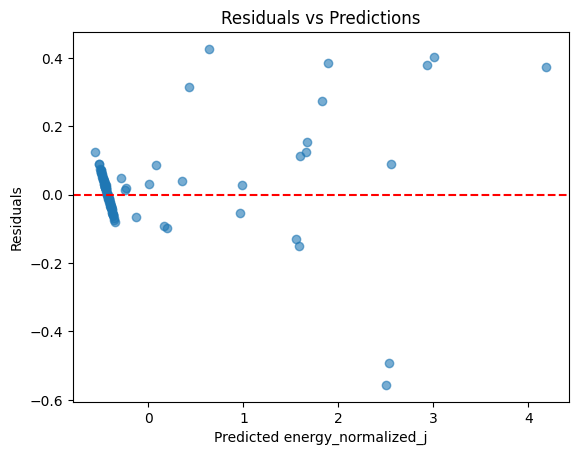

In [47]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted energy_normalized_j")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()

# Comment: there is random scatter around 0 which indicates the model is performing fairly well enough.


In [48]:
# Compare training set and testing set to evaluate for overfitting

# Train set predictions
y_train_pred = model.predict(X_train)

# Test set predictions
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MAE: {train_mae:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}, Test R²: {test_r2:.4f}")

Train MAE: 0.0646, Train R²: 0.9870
Test MAE: 0.0799, Test R²: 0.9819


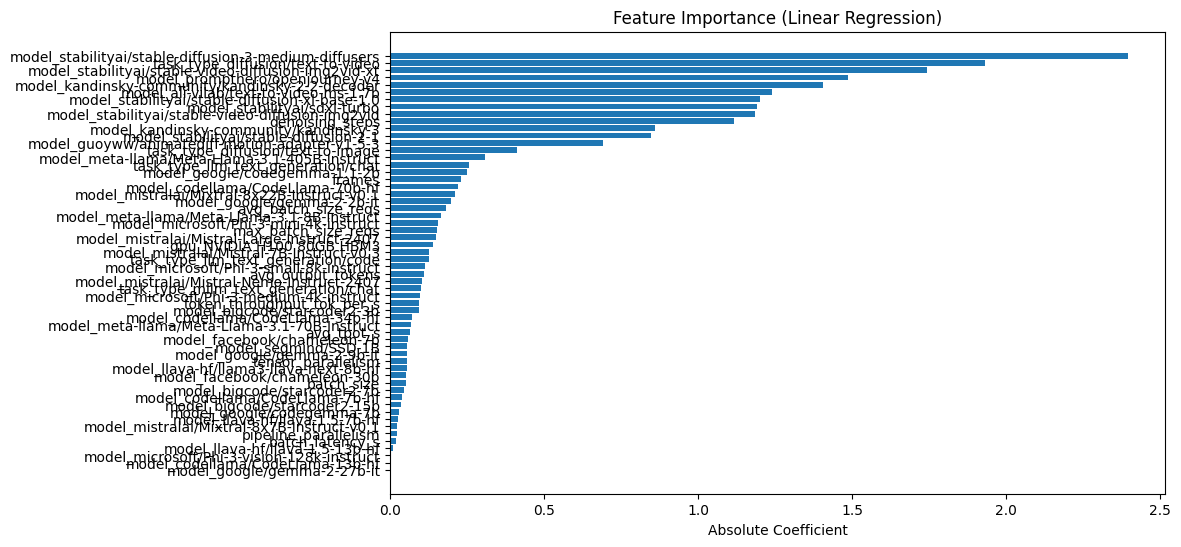

In [49]:
# Derive the various feature importances:
# PROBLEM HERE: model columns are clouding all the other features


# Coefficients
coef = model.coef_

# Make a DataFrame
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': coef,
    'abs_coefficient': np.abs(coef)
})

# Sort by absolute importance
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# visualize
plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'], feature_importance['abs_coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()

### Random Forest Model Where Model name IS a feature

In [50]:
# ATHENA'S NOTE: running a RandomForest regression model
# Chose this because:
# High accuracy
## Handles non-linearity, which may be the case with amount of energy used by video and image data, and conversions
### Less prone to overfitting than a single decision tree, even though slightly slower
#### Good feature importance scores, for business practicality and interpretability

from sklearn.ensemble import RandomForestRegressor
# n_estimators is the number of trees in the forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

# predicting and evaluating performance
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_rf = model_rf.predict(X_test)

print("Random Forest Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest Test R^2:", r2_score(y_test, y_pred_rf))

Random Forest Test MAE: 0.07715116887718663
Random Forest Test R^2: 0.9511830350101794


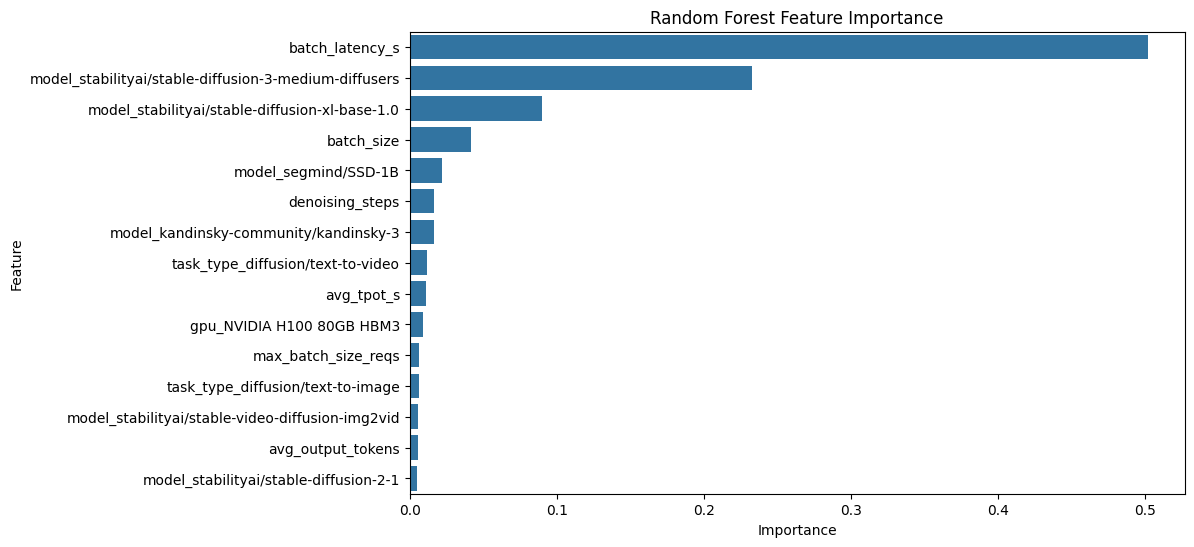

In [51]:
# extracting and analyzing feature importance

# Get the importance scores
importances = model_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.show()

### Next Steps for These Regression Model

*   Understand how it could be applicable to a solution to reduce energy consumption
*   Understand which features are the greatest indicators, etc.
*   Better feature engineering, etc.
*   Use it to derive further insights about HOW energy is used differently by different models, etc.


## Model Exploration Where Model Name is NOT a feature (Ridge Regression, Random Forest)

Section Notes: Random Forest appears to be performing better

### Ridge Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Numeric features
numeric_features = [
    'batch_size', 'batch_latency_s', 'avg_batch_size_reqs',
    'token_throughput_tok_per_s', 'avg_output_tokens',
    'tensor_parallelism', 'pipeline_parallelism', 'denoising_steps', 'frames', 'avg_tpot_s'
]

# Choose the one-hot encoded categorical columns only: DO NOT CHOOSE MODEL COLUMNS
one_hot_cols = [col for col in df_all_tasks_normalized.columns if col.startswith('task_type_') or col.startswith('gpu_')]

# Combine numeric + one-hot
all_features = numeric_features + one_hot_cols

# Select features and target
X = df_all_tasks_normalized[all_features]
y = df_all_tasks_normalized["energy_normalized_j"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Try Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)

train_mae_lr = mean_absolute_error(y_train, y_pred_train_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
train_r2_lr = r2_score(y_train, y_pred_train_lr)

test_mae_lr = mean_absolute_error(y_test, y_pred_test_lr)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
test_r2_lr = r2_score(y_test, y_pred_test_lr)

print("Linear Regression: ")
print(f"Train MAE: {train_mae_lr:.4f}, RMSE: {train_rmse_lr:.4f}, R²: {train_r2_lr:.4f}")
print(f"Test MAE:  {test_mae_lr:.4f}, RMSE: {test_rmse_lr:.4f}, R²: {test_r2_lr:.4f}")

# Try Ridge Regression: it prevents overfitting better than simple linear regression: do more cross validation here!
model_ridge = Ridge(alpha=80.0)
model_ridge.fit(X_train, y_train)
y_pred_test_ridge = model_ridge.predict(X_test)
y_pred_train_ridge = model_ridge.predict(X_train)

train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)

print("Ridge Regression: ")
print(f"Train R²: {train_r2_ridge:.4f}")
print(f"Test R²:  {test_r2_ridge:.4f}")


Linear Regression: 
Train MAE: 0.2263, RMSE: 0.5168, R²: 0.7306
Test MAE:  0.3384, RMSE: 0.9045, R²: 0.2072
Ridge Regression: 
Train R²: 0.6510
Test R²:  0.7240


In [53]:
# Ridge coefficients
ridge_coefs = pd.Series(model_ridge.coef_, index=all_features)

# Sort by coefficient value (descending)
ridge_coefs_sorted = ridge_coefs.sort_values(ascending=False)

print(ridge_coefs_sorted)

denoising_steps                        0.334473
batch_latency_s                        0.308044
task_type_diffusion/text-to-image      0.189406
gpu_NVIDIA H100 80GB HBM3              0.045478
avg_batch_size_reqs                    0.034017
task_type_llm_text_generation/chat     0.005342
avg_tpot_s                            -0.007836
tensor_parallelism                    -0.024194
task_type_mllm_text_generation/chat   -0.066994
avg_output_tokens                     -0.070111
task_type_llm_text_generation/code    -0.082975
token_throughput_tok_per_s            -0.106779
task_type_diffusion/text-to-video     -0.109818
frames                                -0.141086
pipeline_parallelism                  -0.177452
batch_size                            -0.194533
dtype: float64


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

numeric_features = [
    'batch_size', 'batch_latency_s', 'avg_batch_size_reqs',
    'token_throughput_tok_per_s', 'avg_output_tokens',
    'tensor_parallelism', 'pipeline_parallelism',
    'denoising_steps', 'frames', 'avg_tpot_s'
]

X = df_all_tasks_normalized[numeric_features]
y = df_all_tasks_normalized["energy_normalized_j"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=400, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("RandomForest R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


RandomForest R²: 0.89557708864479
MAE: 0.1270169013464008


In [55]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print(importances)

batch_latency_s               0.740772
batch_size                    0.137956
frames                        0.077617
denoising_steps               0.011741
pipeline_parallelism          0.010430
token_throughput_tok_per_s    0.007381
avg_batch_size_reqs           0.004715
avg_tpot_s                    0.004676
avg_output_tokens             0.003058
tensor_parallelism            0.001655
dtype: float64


# Step 6: Finalized Models (Option B) Need to repeat steps 3-4 due to cleaning of individual subsets
Option B: Tasks separated by llm, mllm, and diffusion for better individual insights

## Create Subsets and Clean

In [57]:
# Create individual subsets
df_llm_orig = df_llm_text_generation.copy()
df_mllm_orig = df_mllm_text_generation.copy()
df_diffusion_orig = df_diffusion.copy()

# LLM subset
df_llm_subset = df_llm_orig.copy()
df_llm_subset['energy_normalized_j'] = df_llm_subset['Energy/req (J)'] / df_llm_subset['Avg Output Tokens']
print(f"LLM subset shape: {df_llm_subset.shape}")
print(f"  - Columns: {list(df_llm_subset.columns)}")

# MLLM subset
df_mllm_subset = df_mllm_orig.copy()
df_mllm_subset['energy_normalized_j'] = df_mllm_subset['Energy/req (J)'] / df_mllm_subset['Avg Output Tokens']
print(f"MLLM subset shape: {df_mllm_subset.shape}")
print(f"  - Columns: {list(df_mllm_subset.columns)}")

# Diffusion subset
df_diffusion_subset = df_diffusion_orig.copy()
# Create normalized energy for diffusion based on task type
df_diffusion_subset['energy_normalized_j'] = np.where(
    df_diffusion_subset['Task_Type'] == 'diffusion/text-to-image',
    df_diffusion_subset['Energy/image (J)'],  # J/image
    df_diffusion_subset['Energy/video (J)'] / df_diffusion_subset['Frames']  # J/frame for videos
)
print(f"Diffusion subset shape: {df_diffusion_subset.shape}")
print(f"  - Columns: {list(df_diffusion_subset.columns)}")

LLM subset shape: (314, 12)
  - Columns: ['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)', 'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens', 'Avg BS (reqs)', 'Max BS (reqs)', 'energy_normalized_j']
MLLM subset shape: (42, 12)
  - Columns: ['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)', 'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens', 'Avg BS (reqs)', 'Max BS (reqs)', 'energy_normalized_j']
Diffusion subset shape: (118, 10)
  - Columns: ['Task_Type', 'Model', 'GPU', 'Energy/video (J)', 'Batch latency (s)', 'Batch size', 'Denoising steps', 'Frames', 'Energy/image (J)', 'energy_normalized_j']


In [143]:
# check for columns where energy_normalized_j is <= 0 to apply np.log() later on
subsets = {
    "LLM": df_llm_subset,
    "MLLM": df_mllm_subset,
    "Diffusion": df_diffusion_subset
}

for name, df in subsets.items():
    print(f"Checking {name} subset:")
    print(f"  Shape: {df.shape}")
    print(f"  Columns: {list(df.columns)}")

    # Check energy_normalized_j
    negative_count = (df['energy_normalized_j'] <= 0).sum()
    print(f"  Non-positive energy_normalized_j values: {negative_count}")

    # Optionally check min/max
    print(f"  Min energy_normalized_j: {df['energy_normalized_j'].min():.6f}")
    print(f"  Max energy_normalized_j: {df['energy_normalized_j'].max():.2f}\n")


Checking LLM subset:
  Shape: (314, 13)
  Columns: ['task_type', 'model', 'gpu', 'tensor_parallelism', 'pipeline_parallelism', 'energy_per_request_j', 'avg_tpot_s', 'token_throughput_tok_per_s', 'avg_output_tokens', 'avg_batch_size_reqs', 'max_batch_size_reqs', 'energy_normalized_j', 'provider']
  Non-positive energy_normalized_j values: 0
  Min energy_normalized_j: 0.037787
  Max energy_normalized_j: 7.45

Checking MLLM subset:
  Shape: (42, 13)
  Columns: ['task_type', 'model', 'gpu', 'tensor_parallelism', 'pipeline_parallelism', 'energy_per_request_j', 'avg_tpot_s', 'token_throughput_tok_per_s', 'avg_output_tokens', 'avg_batch_size_reqs', 'max_batch_size_reqs', 'energy_normalized_j', 'provider']
  Non-positive energy_normalized_j values: 0
  Min energy_normalized_j: 0.360070
  Max energy_normalized_j: 3.54

Checking Diffusion subset:
  Shape: (118, 11)
  Columns: ['task_type', 'model', 'gpu', 'energy_per_video_j', 'batch_latency_s', 'batch_size', 'denoising_steps', 'frames', 'energy

In [58]:
# rename columns
rename_map_units = {
    "Task_Type": "task_type",
    "Model": "model",
    "GPU": "gpu",
    "TP": "tensor_parallelism",
    "PP": "pipeline_parallelism",
    "Energy/req (J)": "energy_per_request_j",
    "Avg TPOT (s)": "avg_tpot_s",
    "Token tput (tok/s)": "token_throughput_tok_per_s",
    "Avg Output Tokens": "avg_output_tokens",
    "Avg BS (reqs)": "avg_batch_size_reqs",
    "Max BS (reqs)": "max_batch_size_reqs",
    "Energy/video (J)": "energy_per_video_j",
    "Batch latency (s)": "batch_latency_s",
    "Batch size": "batch_size",
    "Denoising steps": "denoising_steps",
    "Frames": "frames",
    "Energy/image (J)": "energy_per_image_j",
}

# Rename columns for each subset
df_llm_subset.rename(columns=rename_map_units, inplace=True)
df_mllm_subset.rename(columns=rename_map_units, inplace=True)
df_diffusion_subset.rename(columns=rename_map_units, inplace=True)

In [59]:
# group by the provider
df_llm_subset['provider'] = df_llm_subset['model'].apply(lambda x: x.split("/")[0])
df_mllm_subset['provider'] = df_mllm_subset['model'].apply(lambda x: x.split("/")[0])
df_diffusion_subset['provider'] = df_diffusion_subset['model'].apply(lambda x: x.split("/")[0])

In [75]:
# view columns of all subsets
print("LLM subset columns:\n", df_llm_subset.info())
print("\nMLLM subset columns:\n", df_mllm_subset.info())
print("\nDiffusion subset columns:\n", df_diffusion_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   task_type                   314 non-null    object 
 1   model                       314 non-null    object 
 2   gpu                         314 non-null    object 
 3   tensor_parallelism          314 non-null    int64  
 4   pipeline_parallelism        314 non-null    int64  
 5   energy_per_request_j        314 non-null    float64
 6   avg_tpot_s                  314 non-null    float64
 7   token_throughput_tok_per_s  314 non-null    float64
 8   avg_output_tokens           314 non-null    float64
 9   avg_batch_size_reqs         314 non-null    float64
 10  max_batch_size_reqs         314 non-null    int64  
 11  energy_normalized_j         314 non-null    float64
 12  provider                    314 non-null    object 
dtypes: float64(6), int64(3), object(4)


In [61]:
# check for empty values
# LLM
print("LLM missing values:\n", df_llm_subset.isna().sum())

# MLLM
print("MLLM missing values:\n", df_mllm_subset.isna().sum())

# Diffusion: diffusion has empty values but we will focus on this later as LLM/MLLM is our primary objective
print("Diffusion missing values:\n", df_diffusion_subset.isna().sum())

LLM missing values:
 task_type                     0
model                         0
gpu                           0
tensor_parallelism            0
pipeline_parallelism          0
energy_per_request_j          0
avg_tpot_s                    0
token_throughput_tok_per_s    0
avg_output_tokens             0
avg_batch_size_reqs           0
max_batch_size_reqs           0
energy_normalized_j           0
provider                      0
dtype: int64
MLLM missing values:
 task_type                     0
model                         0
gpu                           0
tensor_parallelism            0
pipeline_parallelism          0
energy_per_request_j          0
avg_tpot_s                    0
token_throughput_tok_per_s    0
avg_output_tokens             0
avg_batch_size_reqs           0
max_batch_size_reqs           0
energy_normalized_j           0
provider                      0
dtype: int64
Diffusion missing values:
 task_type               0
model                   0
gpu                 

In [62]:
# fill diffusion empty values with 0
df_diffusion_subset.fillna(0, inplace=True)  # or use other strategies

In [164]:
# one-hot encoding for categorical variables
llm_cat = ["gpu", "task_type"]
mllm_cat = ["gpu", "task_type"]
diffusion_cat = ["gpu", "task_type"]

# LLM
df_llm_encoded = pd.get_dummies(df_llm_subset, columns=llm_cat)

# MLLM
df_mllm_encoded = pd.get_dummies(df_mllm_subset, columns=mllm_cat)

# Diffusion
df_diffusion_encoded = pd.get_dummies(df_diffusion_subset, columns=diffusion_cat)

In [165]:
# no more empty values: false means that there are not any missing values anymore
df_llm_encoded.isna().sum().any()
df_mllm_encoded.isna().sum().any()
df_diffusion_encoded.isna().sum().any()

np.False_

In [166]:
# drop the model column
df_llm_encoded.drop(columns=["model"], inplace=True)
df_mllm_encoded.drop(columns=["model"], inplace=True)
df_diffusion_encoded.drop(columns=["model"], inplace=True)

# random forest does not require numerical scaling so we will skip that step

## Data exploration into providers

In [79]:
# View top energy-consuming providers for each subset

llm_provider_energy = (
    df_llm_subset.groupby('provider')['energy_normalized_j']
    .agg(['mean', 'sum', 'count'])
    .sort_values('mean', ascending=False)
)
print("Top llm energy-consuming models:", llm_provider_energy)

mllm_provider_energy = (
    df_mllm_subset.groupby('provider')['energy_normalized_j']
    .agg(['mean', 'sum', 'count'])
    .sort_values('mean', ascending=False)
)
print("\nTop mllm energy-consuming models:", mllm_provider_energy)

diffusion_provider_energy = (
    df_diffusion_subset.groupby('provider')['energy_normalized_j']
    .agg(['mean', 'sum', 'count'])
    .sort_values('mean', ascending=False)
)
print("\nTop diffusion energy-consuming models:", diffusion_provider_energy)



Top llm energy-consuming models:                 mean        sum  count
provider                              
meta-llama  1.299114  46.768117     36
mistralai   1.001163  82.095338     82
codellama   0.914142  44.792946     49
google      0.216928  16.486504     76
bigcode     0.193080   7.723180     40
microsoft   0.160462   4.974332     31

Top mllm energy-consuming models:                mean        sum  count
provider                             
facebook   1.513187  19.671434     13
microsoft  1.061128   6.366766      6
llava-hf   0.682775  15.703826     23

Top diffusion energy-consuming models:                            mean           sum  count
provider                                            
stabilityai          632.036702  35394.055307     56
segmind              630.211368   5671.902312      9
kandinsky-community  383.262953   7281.996105     19
ali-vilab            322.593015   4516.302204     14
guoyww               215.436868   1292.621206      6
prompthero         

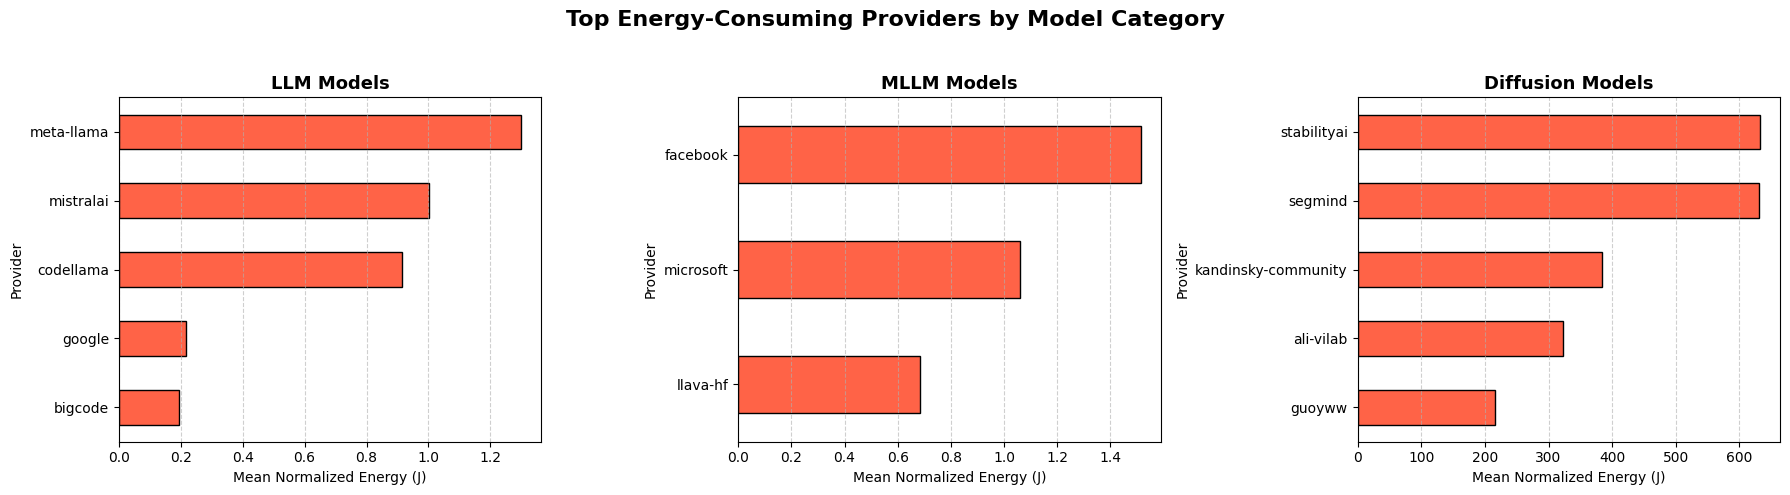

In [83]:
# note: AI was used to create these plots

# Get top 5 providers by mean normalized energy for each subset
top_n = 5
llm_top = llm_provider_energy.head(top_n)
mllm_top = mllm_provider_energy.head(top_n)
diffusion_top = diffusion_provider_energy.head(top_n)

energy_data = {
    'LLM': llm_top,
    'MLLM': mllm_top,
    'Diffusion': diffusion_top
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
fig.suptitle('Top Energy-Consuming Providers by Model Category', fontsize=16, weight='bold')

# Plot each subset
for ax, (title, df_energy) in zip(axes, energy_data.items()):
    df_energy['mean'].sort_values().plot(
        kind='barh',
        ax=ax,
        color='tomato',
        edgecolor='black'
    )
    ax.set_title(f'{title} Models', fontsize=13, weight='bold')
    ax.set_xlabel('Mean Normalized Energy (J)')
    ax.set_ylabel('Provider')
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<Figure size 1000x600 with 0 Axes>

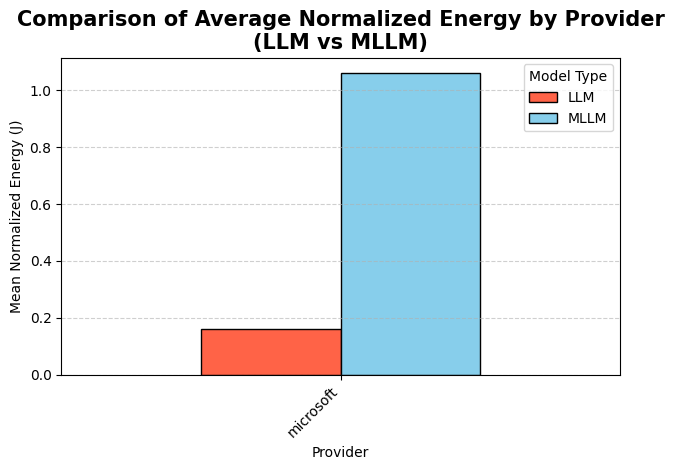

In [84]:
# compare energy consumption between llm and mllm providers
# they only share 1 provider-> microsoft

import matplotlib.pyplot as plt
import pandas as pd

# Combine mean energy for LLM and MLLM into one DataFrame
comparison_df = (
    pd.concat([
        llm_provider_energy['mean'].rename('LLM'),
        mllm_provider_energy['mean'].rename('MLLM')
    ], axis=1)
)

# Keep only providers that exist in both sets
comparison_df = comparison_df.dropna()

# Sort by average of both columns for cleaner order
comparison_df = comparison_df.loc[
    comparison_df.mean(axis=1).sort_values(ascending=False).index
]

# Plot
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', color=['tomato', 'skyblue'], edgecolor='black')

plt.title('Comparison of Average Normalized Energy by Provider\n(LLM vs MLLM)', fontsize=15, weight='bold')
plt.ylabel('Mean Normalized Energy (J)')
plt.xlabel('Provider')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Type')

plt.tight_layout()
plt.show()


## LLM Model Build: Random Forest (DROP PROVIDER AS IT IS CLOUDING INSIGHTS)
Notes: Applied np.log() to energy_normalized_j

Performance: R^2 = 0.95

In [167]:
# Features and target for LLM subset
df_llm_encoded.info()
llm_features = df_llm_encoded.drop(["energy_normalized_j", "provider", "energy_per_request_j"], axis=1)
llm_target = np.log(df_llm_encoded["energy_normalized_j"])

# Train/test split for LLM
X_train_llm, X_test_llm, y_train_llm, y_test_llm = train_test_split(
    llm_features, llm_target, test_size=0.2, random_state=42
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tensor_parallelism                  314 non-null    int64  
 1   pipeline_parallelism                314 non-null    int64  
 2   energy_per_request_j                314 non-null    float64
 3   avg_tpot_s                          314 non-null    float64
 4   token_throughput_tok_per_s          314 non-null    float64
 5   avg_output_tokens                   314 non-null    float64
 6   avg_batch_size_reqs                 314 non-null    float64
 7   max_batch_size_reqs                 314 non-null    int64  
 8   energy_normalized_j                 314 non-null    float64
 9   provider                            314 non-null    object 
 10  gpu_NVIDIA A100-SXM4-40GB           314 non-null    bool   
 11  gpu_NVIDIA H100 80GB HBM3           314 non-n

In [168]:
# LLM random forest
rf_llm = RandomForestRegressor(n_estimators=100, random_state=42)
rf_llm.fit(X_train_llm, y_train_llm)
y_pred_llm = rf_llm.predict(X_test_llm)

rmse_llm = np.sqrt(mean_squared_error(y_test_llm, y_pred_llm))
r2_llm = r2_score(y_test_llm, y_pred_llm)

print("LLM RMSE:", rmse_llm)
print("LLM R^2:", r2_llm)

LLM RMSE: 0.2393362975202585
LLM R^2: 0.9587285814138566


## MLLM Model Build: Random Forest (DROP PROVIDER AS IT IS CLOUDING INSIGHTS)
Notes: not performing as well due to fewer columns
R^2 = 0.66

In [174]:
# Features and target for MLLM subset
df_mllm_encoded.info()
mllm_features = df_mllm_encoded.drop(["energy_normalized_j", "provider", "energy_per_request_j"], axis=1)
mllm_target = np.log(df_mllm_encoded["energy_normalized_j"])

X_train_mllm, X_test_mllm, y_train_mllm, y_test_mllm = train_test_split(
    mllm_features, mllm_target, test_size=0.2, random_state=42
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tensor_parallelism                   42 non-null     int64  
 1   pipeline_parallelism                 42 non-null     int64  
 2   energy_per_request_j                 42 non-null     float64
 3   avg_tpot_s                           42 non-null     float64
 4   token_throughput_tok_per_s           42 non-null     float64
 5   avg_output_tokens                    42 non-null     float64
 6   avg_batch_size_reqs                  42 non-null     float64
 7   max_batch_size_reqs                  42 non-null     int64  
 8   energy_normalized_j                  42 non-null     float64
 9   provider                             42 non-null     object 
 10  gpu_NVIDIA A100-SXM4-40GB            42 non-null     bool   
 11  gpu_NVIDIA H100 80GB HBM3         

In [175]:
# MLLM random forest
rf_mllm = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mllm.fit(X_train_mllm, y_train_mllm)
y_pred_mllm = rf_mllm.predict(X_test_mllm)
rmse_mllm = np.sqrt(mean_squared_error(y_test_mllm, y_pred_mllm))
r2_mllm = r2_score(y_test_mllm, y_pred_mllm)
print("MLLM RMSE:", rmse_mllm)
print("MLLM R2:", r2_mllm)

MLLM RMSE: 0.32616032763050656
MLLM R2: 0.667324440550945


## Diffusion Model Build: Random Forest (DROP PROVIDER AS IT IS CLOUDING INSIGHTS)

Notes: Applied np.log() to energy_normalized_j

Performance: R^2 = 0.76

In [171]:
# Features and target for Diffusion subset
diffusion_features = df_diffusion_encoded.drop(["energy_normalized_j", "provider","energy_per_image_j", "energy_per_video_j"], axis=1)
diffusion_target = np.log(df_diffusion_encoded["energy_normalized_j"])

X_train_diffusion, X_test_diffusion, y_train_diffusion, y_test_diffusion = train_test_split(
    diffusion_features, diffusion_target, test_size=0.2, random_state=42
)

In [172]:
# diffusion random forest
rf_diffusion = RandomForestRegressor(n_estimators=100, random_state=42)
rf_diffusion.fit(X_train_diffusion, y_train_diffusion)
y_pred_diffusion = rf_diffusion.predict(X_test_diffusion)
rmse_diffusion = np.sqrt(mean_squared_error(y_test_diffusion, y_pred_diffusion))
r2_diffusion = r2_score(y_test_diffusion, y_pred_diffusion)
print("Diffusion RMSE:", rmse_diffusion)
print("Diffusion R2:", r2_diffusion)

Diffusion RMSE: 0.4565550859744872
Diffusion R2: 0.7644247796888893


## Find Top Features

In [176]:
# LLM
feat_imp_llm = pd.Series(rf_llm.feature_importances_, index=X_train_llm.columns)
print("LLM Top Features:")
print(feat_imp_llm.sort_values(ascending=False).head(10))

# LLM
feat_imp_mllm = pd.Series(rf_mllm.feature_importances_, index=X_train_mllm.columns)
print("\nMLLM Top Features:")
print(feat_imp_mllm.sort_values(ascending=False).head(10))

# Diffusion
feat_imp_diffusion = pd.Series(rf_diffusion.feature_importances_, index=X_train_diffusion.columns)
print("\nDiffusion Top Features:")
print(feat_imp_diffusion.sort_values(ascending=False).head(10))

LLM Top Features:
tensor_parallelism                    0.767203
token_throughput_tok_per_s            0.180239
avg_output_tokens                     0.015168
gpu_NVIDIA H100 80GB HBM3             0.009324
gpu_NVIDIA A100-SXM4-40GB             0.008035
avg_tpot_s                            0.007012
avg_batch_size_reqs                   0.006696
pipeline_parallelism                  0.002787
max_batch_size_reqs                   0.002042
task_type_llm_text_generation/code    0.000874
dtype: float64

MLLM Top Features:
tensor_parallelism                     0.460019
token_throughput_tok_per_s             0.397667
avg_output_tokens                      0.044075
avg_tpot_s                             0.039132
avg_batch_size_reqs                    0.027701
gpu_NVIDIA A100-SXM4-40GB              0.014144
gpu_NVIDIA H100 80GB HBM3              0.008934
max_batch_size_reqs                    0.008328
pipeline_parallelism                   0.000000
task_type_mllm_text_generation/chat    0.0000

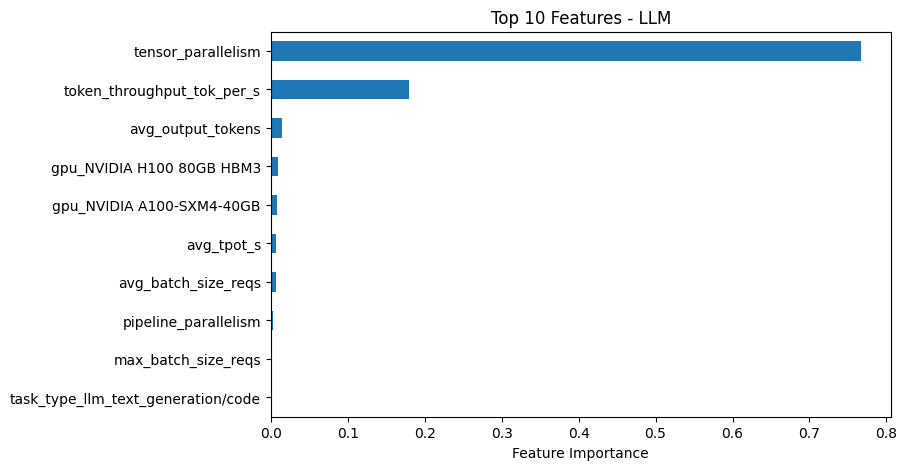

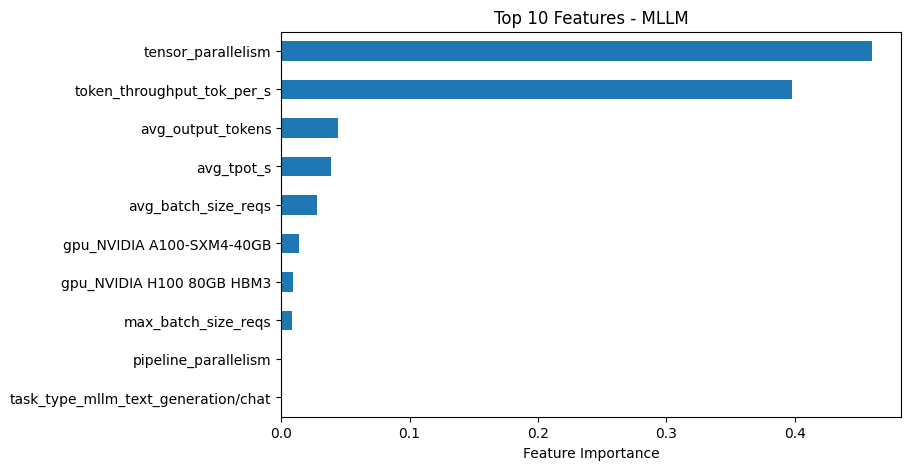

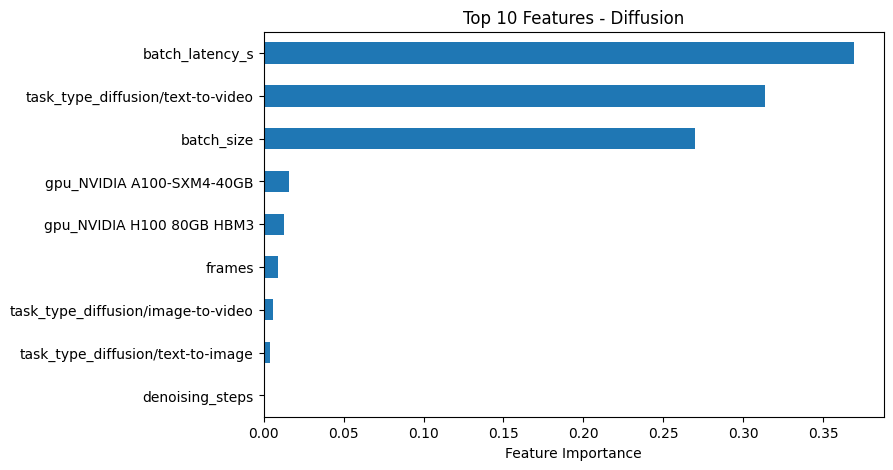

In [177]:
# plot visually
import matplotlib.pyplot as plt

def plot_top_features(feat_imp, title):
    top_features = feat_imp.sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,5))
    top_features.plot(kind='barh')
    plt.gca().invert_yaxis()  # highest on top
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.show()

# LLM
plot_top_features(feat_imp_llm, "Top 10 Features - LLM")

# MLLM
plot_top_features(feat_imp_mllm, "Top 10 Features - MLLM")

# Diffusion
plot_top_features(feat_imp_diffusion, "Top 10 Features - Diffusion")

# Other Work


## Make individual Subsets for llm, mllm, and diffusion

What was done here:



Note: Diffusion was excluded because there were no data available for that.

In [ ]:

# Step 1: Create individual subsets from the original dataframes (before rename)
print("\n--- Step 1: Creating Subsets ---")

# Get original unrenamed copies
df_llm_orig = df_llm_text_generation.copy()
df_mllm_orig = df_mllm_text_generation.copy()
df_diffusion_orig = df_diffusion.copy()

# LLM subset
df_llm_subset = df_llm_orig.copy()
df_llm_subset['energy_normalized_j'] = df_llm_subset['Energy/req (J)'] / df_llm_subset['Avg Output Tokens']
print(f"LLM subset shape: {df_llm_subset.shape}")
print(f"  - Columns: {list(df_llm_subset.columns)}")

# MLLM subset
df_mllm_subset = df_mllm_orig.copy()
df_mllm_subset['energy_normalized_j'] = df_mllm_subset['Energy/req (J)'] / df_mllm_subset['Avg Output Tokens']
print(f"MLLM subset shape: {df_mllm_subset.shape}")
print(f"  - Columns: {list(df_mllm_subset.columns)}")

# Diffusion subset
df_diffusion_subset = df_diffusion_orig.copy()
# Create normalized energy for diffusion based on task type
df_diffusion_subset['energy_normalized_j'] = np.where(
    df_diffusion_subset['Task_Type'] == 'diffusion/text-to-image',
    df_diffusion_subset['Energy/image (J)'],  # J/image
    df_diffusion_subset['Energy/video (J)'] / df_diffusion_subset['Frames']  # J/frame for videos
)
print(f"Diffusion subset shape: {df_diffusion_subset.shape}")
print(f"  - Columns: {list(df_diffusion_subset.columns)}")


--- Step 1: Creating Subsets ---
LLM subset shape: (314, 12)
  - Columns: ['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)', 'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens', 'Avg BS (reqs)', 'Max BS (reqs)', 'energy_normalized_j']
MLLM subset shape: (42, 12)
  - Columns: ['Task_Type', 'Model', 'GPU', 'TP', 'PP', 'Energy/req (J)', 'Avg TPOT (s)', 'Token tput (tok/s)', 'Avg Output Tokens', 'Avg BS (reqs)', 'Max BS (reqs)', 'energy_normalized_j']
Diffusion subset shape: (118, 10)
  - Columns: ['Task_Type', 'Model', 'GPU', 'Energy/video (J)', 'Batch latency (s)', 'Batch size', 'Denoising steps', 'Frames', 'Energy/image (J)', 'energy_normalized_j']


In [ ]:
# Step 2: Clean and prepare each subset
print("\n--- Step 2: Cleaning Subsets ---")

def prepare_subset(df, task_name):
    """Clean and prepare a subset for modeling."""
    df_clean = df.copy()

    print(f"\n  {task_name} - Initial shape: {df_clean.shape}")

    # Drop NaN energy values
    initial_count = len(df_clean)
    df_clean = df_clean[df_clean['energy_normalized_j'].notna()]
    final_count = len(df_clean)
    print(f"  {task_name}: Dropped {initial_count - final_count} rows with NaN energy")

    if len(df_clean) == 0:
        print(f"  {task_name}: WARNING - No data remaining after dropping NaN energy values")
        return df_clean

    # Fill missing values for applicable columns (set to 0 where not applicable)
    columns_to_fill = [
        'Avg Output Tokens', 'Frames', 'Denoising steps',
        'TP', 'PP',
        'Avg TPOT (s)', 'Token tput (tok/s)',
        'Batch latency (s)', 'Batch size',
        'Avg BS (reqs)', 'Max BS (reqs)'
    ]

    # Only fill columns that exist in the dataframe
    existing_cols = [col for col in columns_to_fill if col in df_clean.columns]
    if existing_cols:
        df_clean[existing_cols] = df_clean[existing_cols].fillna(0)

    # Check for remaining NaN values
    remaining_nans = df_clean.isna().sum().sum()
    if remaining_nans > 0:
        print(f"  {task_name}: WARNING - {remaining_nans} NaN values remaining after filling")
        # For now, drop rows with any remaining NaN values
        initial_rows = len(df_clean)
        df_clean = df_clean.dropna()
        dropped = initial_rows - len(df_clean)
        if dropped > 0:
            print(f"  {task_name}: Dropped {dropped} rows with remaining NaN values")

    # One-hot encode categorical features
    categorical_cols = []
    for col in ['Task_Type', 'Model', 'GPU']:
        if col in df_clean.columns:
            categorical_cols.append(col)

    if categorical_cols:
        df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True, dummy_na=False)

    print(f"  {task_name} - Final shape: {df_clean.shape}")
    return df_clean

df_llm_clean = prepare_subset(df_llm_subset, "LLM")
df_mllm_clean = prepare_subset(df_mllm_subset, "MLLM")
df_diffusion_clean = prepare_subset(df_diffusion_subset, "Diffusion")

print(f"\nLLM clean shape: {df_llm_clean.shape}")
print(f"MLLM clean shape: {df_mllm_clean.shape}")
print(f"Diffusion clean shape: {df_diffusion_clean.shape}") # add divider cells


--- Step 2: Cleaning Subsets ---

  LLM - Initial shape: (314, 12)
  LLM: Dropped 0 rows with NaN energy
  LLM - Final shape: (314, 33)

  MLLM - Initial shape: (42, 12)
  MLLM: Dropped 0 rows with NaN energy
  MLLM - Final shape: (42, 15)

  Diffusion - Initial shape: (118, 10)
  Diffusion: Dropped 0 rows with NaN energy
  Diffusion: WARNING - 118 NaN values remaining after filling
  Diffusion: Dropped 118 rows with remaining NaN values
  Diffusion - Final shape: (0, 7)

LLM clean shape: (314, 33)
MLLM clean shape: (42, 15)
Diffusion clean shape: (0, 7)


In [ ]:
# Step 3: Scale numerical features for each subset
print("\n--- Step 3: Scaling Subsets ---")

def scale_subset(df, subset_name):
    """Scale numerical features in a subset."""
    df_scaled = df.copy()

    # Check if dataframe is empty
    if len(df_scaled) == 0:
        print(f"  {subset_name}: WARNING - Empty dataframe, cannot scale")
        return df_scaled, None

    numeric_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Remove target variable from scaling
    if 'energy_normalized_j' in numeric_cols:
        numeric_cols.remove('energy_normalized_j')

    if numeric_cols and len(df_scaled) > 0:
        scaler = StandardScaler()
        df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
        return df_scaled, scaler
    else:
        return df_scaled, None

df_llm_scaled, scaler_llm = scale_subset(df_llm_clean, "LLM")
df_mllm_scaled, scaler_mllm = scale_subset(df_mllm_clean, "MLLM")
df_diffusion_scaled, scaler_diffusion = scale_subset(df_diffusion_clean, "Diffusion")

print("Scaling complete for all subsets")


--- Step 3: Scaling Subsets ---
  Diffusion: WARNING - Empty dataframe, cannot scale
Scaling complete for all subsets


In [ ]:
# Step 4: Train separate models for each task type
print("\n--- Step 4: Training Individual Models ---")

def train_model_for_subset(df_scaled, subset_name):
    """Train a linear regression model for a specific subset."""
    # Check if dataframe is empty
    if len(df_scaled) == 0:
        print(f"\n{subset_name} Model: SKIPPED - No data available after cleaning")
        return None, None, None, None, None

    # Separate features and target
    X = df_scaled.drop(columns=['energy_normalized_j'])
    y = df_scaled['energy_normalized_j']

    # Check if we have enough samples for train/test split
    if len(df_scaled) < 2:
        print(f"\n{subset_name} Model: SKIPPED - Not enough samples (need at least 2, got {len(df_scaled)})")
        return None, None, None, None, None

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\n{subset_name} Model Performance:")
    print(f"  Training - MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
    print(f"  Testing  - MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

    return model, X_train, X_test, y_train, y_test

# Train models
print("\n1. LLM Text Generation Model")
model_llm, X_train_llm, X_test_llm, y_train_llm, y_test_llm = train_model_for_subset(df_llm_scaled, "LLM")

print("\n2. MLLM Text Generation Model")
model_mllm, X_train_mllm, X_test_mllm, y_train_mllm, y_test_mllm = train_model_for_subset(df_mllm_scaled, "MLLM")

print("\n3. Diffusion Model")
model_diffusion, X_train_diffusion, X_test_diffusion, y_train_diffusion, y_test_diffusion = train_model_for_subset(df_diffusion_scaled, "Diffusion")


--- Step 4: Training Individual Models ---

1. LLM Text Generation Model

LLM Model Performance:
  Training - MAE: 0.0666, R²: 0.9724
  Testing  - MAE: 0.0947, R²: 0.9830

2. MLLM Text Generation Model

MLLM Model Performance:
  Training - MAE: 0.0225, R²: 0.9978
  Testing  - MAE: 0.0477, R²: 0.9928

3. Diffusion Model

Diffusion Model: SKIPPED - No data available after cleaning


In [ ]:
# Step 5: Summarize Results
print("\n" + "="*80)
print("OPTION B RESULTS SUMMARY")
print("="*80)

print("\nIndividual Models Performance:")
if model_llm is not None:
    llm_r2 = r2_score(y_test_llm, model_llm.predict(X_test_llm))
    llm_mae = mean_absolute_error(y_test_llm, model_llm.predict(X_test_llm))
    print(f"  - LLM:       Test R²: {llm_r2:.4f}, MAE: {llm_mae:.4f}")
else:
    print(f"  - LLM:       SKIPPED (no data)")

if model_mllm is not None:
    mllm_r2 = r2_score(y_test_mllm, model_mllm.predict(X_test_mllm))
    mllm_mae = mean_absolute_error(y_test_mllm, model_mllm.predict(X_test_mllm))
    print(f"  - MLLM:      Test R²: {mllm_r2:.4f}, MAE: {mllm_mae:.4f}")
else:
    print(f"  - MLLM:      SKIPPED (no data)")

if model_diffusion is not None:
    diffusion_r2 = r2_score(y_test_diffusion, model_diffusion.predict(X_test_diffusion))
    diffusion_mae = mean_absolute_error(y_test_diffusion, model_diffusion.predict(X_test_diffusion))
    print(f"  - Diffusion: Test R²: {diffusion_r2:.4f}, MAE: {diffusion_mae:.4f}")
else:
    print(f"  - Diffusion: SKIPPED (no data available)")

print("\n--- Benefits of Individual Models ---")
print("  ✓ Task-specific feature importance")
print("  ✓ Better handling of task-specific patterns")
print("  ✓ More interpretable results per task type")
print("  ✓ Potential for better predictions by accounting for task heterogeneity")



OPTION B RESULTS SUMMARY

Individual Models Performance:
  - LLM:       Test R²: 0.9830, MAE: 0.0947
  - MLLM:      Test R²: 0.9928, MAE: 0.0477
  - Diffusion: SKIPPED (no data available)

--- Benefits of Individual Models ---
  ✓ Task-specific feature importance
  ✓ Better handling of task-specific patterns
  ✓ More interpretable results per task type
  ✓ Potential for better predictions by accounting for task heterogeneity


## Linear Regression and Random Forest for Text Generation Only
We want to focus on text generation as it is the primary usage of corporate environments over diffusion-based tasks.

Once we have these two models, we can compare the differences.


In [ ]:
print(df_all_tasks_normalized.columns)


Index(['tensor_parallelism', 'pipeline_parallelism', 'avg_tpot_s',
       'token_throughput_tok_per_s', 'avg_output_tokens',
       'avg_batch_size_reqs', 'max_batch_size_reqs', 'batch_latency_s',
       'batch_size', 'denoising_steps', 'frames', 'energy_normalized_j',
       'task_type_diffusion/text-to-image',
       'task_type_diffusion/text-to-video',
       'task_type_llm_text_generation/chat',
       'task_type_llm_text_generation/code',
       'task_type_mllm_text_generation/chat', 'gpu_NVIDIA H100 80GB HBM3',
       'model_ali-vilab/text-to-video-ms-1.7b', 'model_bigcode/starcoder2-15b',
       'model_bigcode/starcoder2-3b', 'model_bigcode/starcoder2-7b',
       'model_codellama/CodeLlama-13b-hf', 'model_codellama/CodeLlama-34b-hf',
       'model_codellama/CodeLlama-70b-hf', 'model_codellama/CodeLlama-7b-hf',
       'model_facebook/chameleon-30b', 'model_facebook/chameleon-7b',
       'model_google/codegemma-1.1-2b', 'model_google/codegemma-7b',
       'model_google/gemma-2-27b

In [ ]:
# --- Filter for Text Generation Tasks ---
df_text = df_all_tasks_normalized[
    (df_all_tasks_normalized.get("task_type_llm_text_generation/chat", 0) == 1) |
    (df_all_tasks_normalized.get("task_type_llm_text_generation/code", 0) == 1) |
    (df_all_tasks_normalized.get("task_type_mllm_text_generation/chat", 0) == 1)
].copy()

# --- Select Numeric Features ---
numeric_features = [
    'batch_size', 'batch_latency_s', 'avg_batch_size_reqs',
    'token_throughput_tok_per_s', 'avg_output_tokens',
    'tensor_parallelism', 'pipeline_parallelism', 'avg_tpot_s'
]

# Filter only existing columns (in case some are missing)
numeric_features = [f for f in numeric_features if f in df_text.columns]

X = df_text[numeric_features]
y = df_text["energy_normalized_j"]

# --- Train-Test Split ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Option 1: Linear Regression ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Linear Regression (Text Gen Only)")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

# --- Option 2: Random Forest ---
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("\nRandom Forest (Text Gen Only)")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Linear Regression (Text Gen Only)
MAE: 0.001051622068591922
R²: 0.6835244375606313

Random Forest (Text Gen Only)
MAE: 0.0004257901172528833
R²: 0.9230922435658172


seems like there is room for improvement for the linear regression( R² ≈ 0.68).
we can:
1. Remove irrelevant feature
2. Data Cleaning
3. Ridge regression to reduce overfitting

## Predicted vs Actual Consumption
Interpretation: Points closer to the diagonal line → better predictions

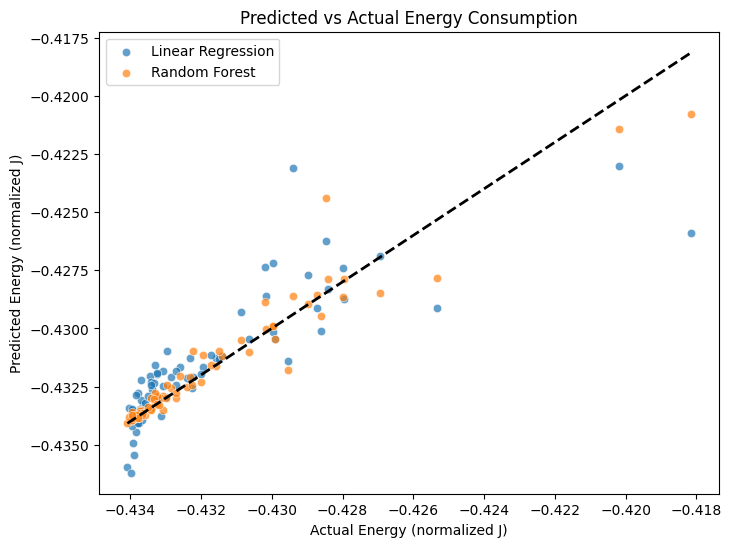

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, label='Linear Regression', alpha=0.7)
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # diagonal line
plt.xlabel("Actual Energy (normalized J)")
plt.ylabel("Predicted Energy (normalized J)")
plt.title("Predicted vs Actual Energy Consumption")
plt.legend()
plt.show()

## Important features

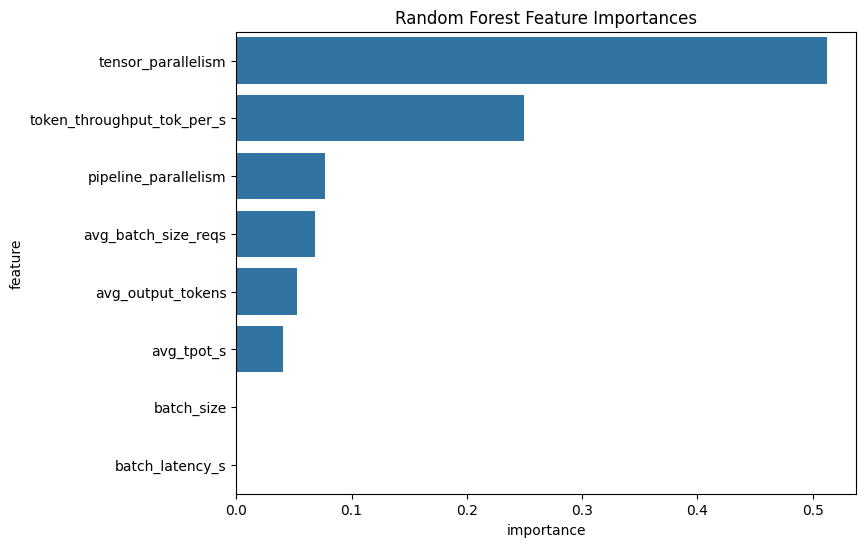

In [ ]:
import pandas as pd

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title("Random Forest Feature Importances")
plt.show()
